<a href="https://colab.research.google.com/github/sanjayrawat2468/Hotel-Booking-Analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

## **Importing required for data manipulation, clean and visualisation**

In [6]:
# Importing all the required modules (liberaries) to work on.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

# **Now Importing Dataset** 

In [7]:
# Mount The Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
path = ('/content/Hotel Bookings.csv')
df = pd.read_csv(path)
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


# **Lets find out the shape of data** 

---



In [9]:
df.shape

(81537, 32)

# **Lets find some info about data or insights of data** 


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81537 entries, 0 to 81536
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           81537 non-null  object 
 1   is_canceled                     81537 non-null  int64  
 2   lead_time                       81537 non-null  int64  
 3   arrival_date_year               81537 non-null  int64  
 4   arrival_date_month              81537 non-null  object 
 5   arrival_date_week_number        81537 non-null  int64  
 6   arrival_date_day_of_month       81537 non-null  int64  
 7   stays_in_weekend_nights         81537 non-null  int64  
 8   stays_in_week_nights            81537 non-null  int64  
 9   adults                          81537 non-null  int64  
 10  children                        81533 non-null  float64
 11  babies                          81537 non-null  int64  
 12  meal                            

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,81537.0,0.530520,0.499071,0.00,0.0,1.0,1.0,1.0
lead_time,81537.0,112.695206,112.343339,0.00,21.0,77.0,174.0,737.0
arrival_date_year,81537.0,2016.041122,0.754119,2015.00,2015.0,2016.0,2017.0,2017.0
arrival_date_week_number,81537.0,28.165471,13.652905,1.00,17.0,29.0,39.0,53.0
arrival_date_day_of_month,81537.0,15.699327,8.785585,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,81537.0,0.983210,1.051007,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,81537.0,2.669708,2.073458,0.00,1.0,2.0,3.0,50.0
adults,81537.0,1.857034,0.597639,0.00,2.0,2.0,2.0,55.0
children,81533.0,0.101799,0.398340,0.00,0.0,0.0,0.0,10.0
babies,81537.0,0.008548,0.103358,0.00,0.0,0.0,0.0,10.0


In [12]:
df.hotel.value_counts()

City Hotel      41477
Resort Hotel    40060
Name: hotel, dtype: int64

# **Lets count the NaN or Null values in dataset**

In [13]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             487
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12057
company                           76928


# **Lets fill the Null values as company and agent column has so many** 

In [14]:
df[['company','agent']] = df[['company','agent']].fillna(0)
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           487
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [15]:
# Lets make a copy of original data
df_clean = df.copy()

In [16]:
# Now fill the country column with values
df_clean['country'].fillna('others', inplace = True)

# Check for null values
df_clean.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# **Overview of the type of hotel by code and separating them**

In [17]:
df_clean.value_counts('hotel')

hotel
City Hotel      41477
Resort Hotel    40060
dtype: int64

In [18]:
# Separating hotels into two dataframe
df_resort = df_clean[df_clean["hotel"] == 'Resort Hotel']
df_city = df_clean[df_clean["hotel"] == 'City Hotel']
print(df_city.shape)
print(df_resort.shape)

(41477, 32)
(40060, 32)


In [19]:
# Plotting over pie chart 
# Importing Required Packages
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

# Defining Labels & Values
labels = df_clean['hotel'].value_counts().index
values = df_clean['hotel'].value_counts()

fig = px.pie(df_clean,
             values=values,
             names=labels,
             title="Booking Volume : City Hotel VS Resort Hotel",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="percent+label",hole =0.3,textfont_size=16)
fig.show()





Here we conclude that the City hotels are preffered over Resort hotels

# **Lets have an overview of the number of people who booked the hotel**

In [20]:
# By Children
df_clean['children'].groupby(df_clean['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,41473.0,0.075832,0.345150,0.0,0.0,0.0,0.0,3.0
Resort Hotel,40060.0,0.128682,0.445195,0.0,0.0,0.0,0.0,10.0


In [21]:
# By Adults
df_clean['adults'].groupby(df_clean['hotel']).describe()


,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,41477.0,1.847265,0.482039,0.0,2.0,2.0,2.0,4.0
Resort Hotel,40060.0,1.867149,0.697285,0.0,2.0,2.0,2.0,55.0


It show that mean values of resort hotels are higher for adults & childrens so we can conclude from here that the resort hotels are better choice for families

# **Overview of cancelled bookings**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



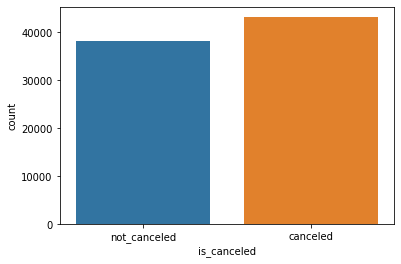

In [34]:
df_clean['is_canceled'] = df_clean.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_data = df_clean['is_canceled']
sns.countplot(canceled_data)

It shows that majority of bookings were canceled

# **Lets look into cancellation rate among different type of hotel**


Text(0.5, 1.0, 'Graph showing cancellation rates in city and resort hotel')

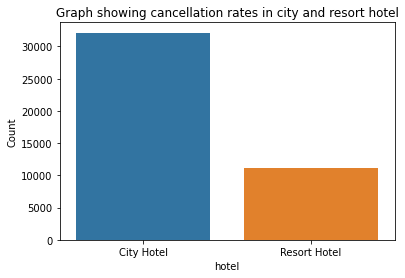

In [39]:
data = ['is_canceled', 'hotel']
type_of_hotel_canceled = df_clean[data]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'canceled'].groupby(['hotel']).size().reset_index(name = 'Count')
sns.barplot(data = canceled_hotel, x = 'hotel', y = 'Count').set_title('Graph showing cancellation rates in city and resort hotel')

We conclude here that the majority of cancellation is for City Hotels

# **Booking ratio for each year**


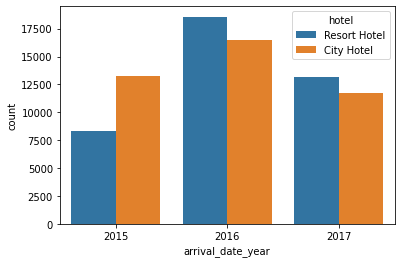

In [53]:
data = ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
period_arrival = df_clean[data]
sns.countplot(data = period_arrival, x = 'arrival_date_year', hue = 'hotel')

We can conclude a lot of information about yearly bookings for city & resort hotels

# **Overview of arrival monthwise for city and resort hotels**


Text(0, 0.5, 'Count')

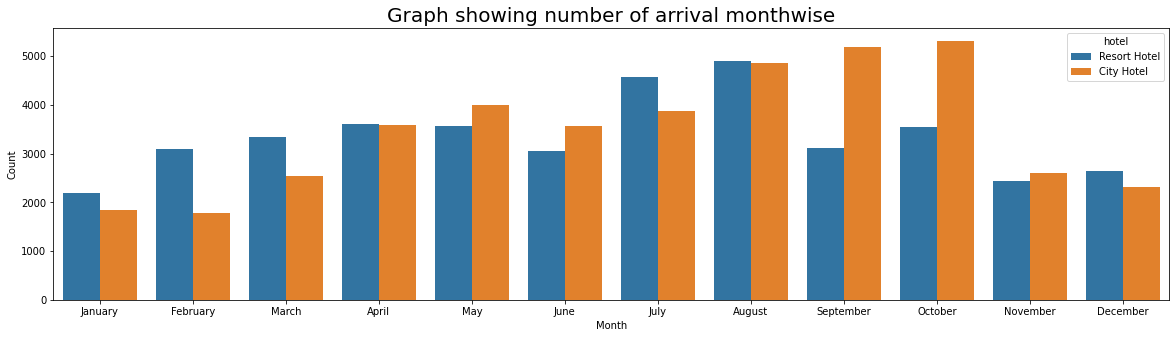

In [56]:
plt.figure(figsize=(20,5))

sns.countplot(data = period_arrival, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival monthwise',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')

We can see the monthly booking ratio for city and resort hotels 